# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

### Step 3. Assign it to a variable called chipo.

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv",sep='\t')
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 4. See the first 10 entries

In [ ]:
df.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

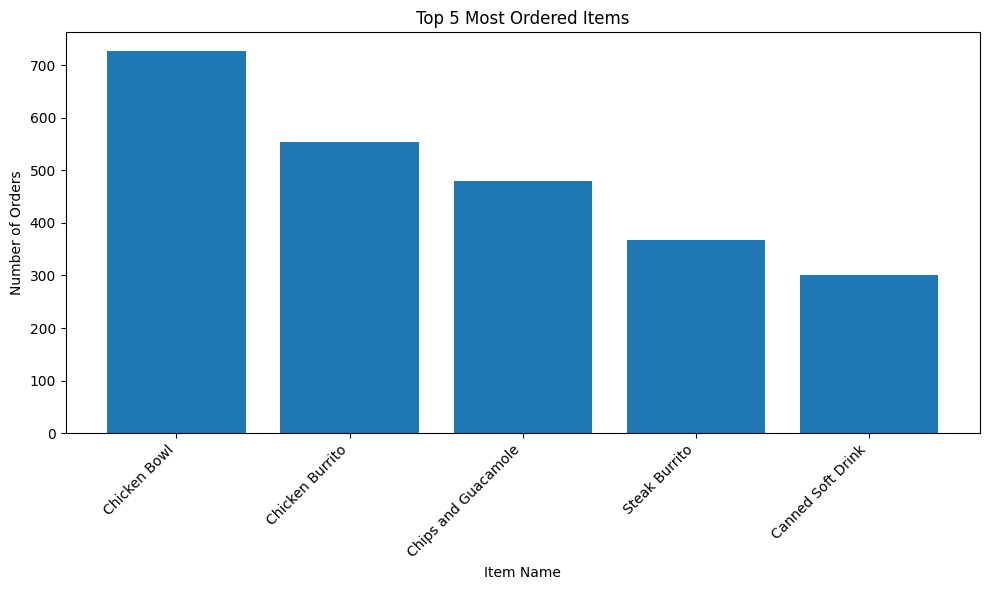

In [ ]:
item_counts = df['item_name'].value_counts().head(5)

plt.figure(figsize=(10, 6))
plt.bar(item_counts.index, item_counts.values)
plt.xlabel('Item Name')
plt.ylabel('Number of Orders')
plt.title('Top 5 Most Ordered Items')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

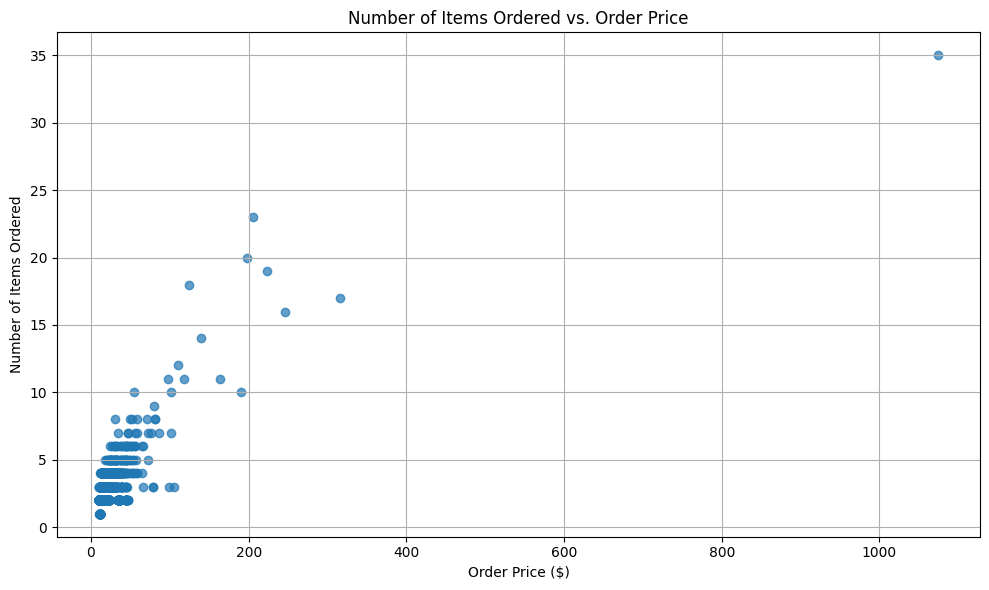

In [ ]:
# Step 6. Create a scatterplot with the number of items orderered per order price

# Convert 'item_price' to numeric
df['item_price'] = df['item_price'].str.replace('$', '', regex=False).astype(float)

# Calculate total price for each entry (quantity * item_price)
df['total_item_price'] = df['quantity'] * df['item_price']

# Group by order_id to get total quantity and total price per order
order_grouped = df.groupby('order_id').agg(
    total_quantity=('quantity', 'sum'),
    total_price=('total_item_price', 'sum')
).reset_index()

# Create the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(x=order_grouped['total_price'], y=order_grouped['total_quantity'], alpha=0.7)
plt.xlabel('Order Price ($)')
plt.ylabel('Number of Items Ordered')
plt.title('Number of Items Ordered vs. Order Price')
plt.grid(True)
plt.tight_layout()
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.

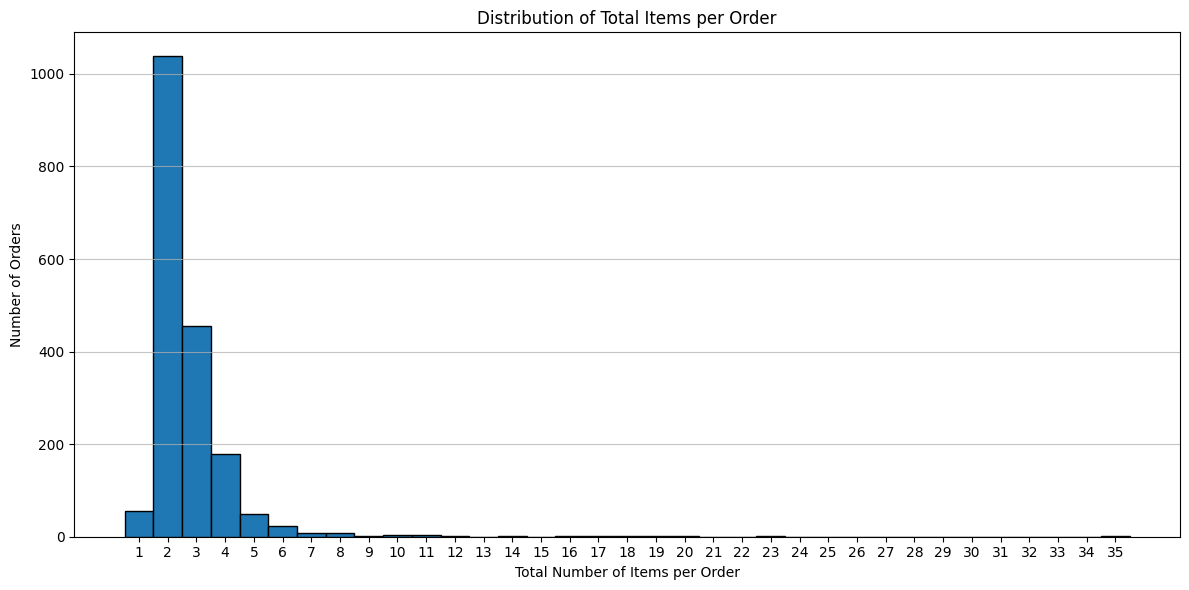

In [ ]:
# Question: What is the distribution of the total number of items purchased per order?

plt.figure(figsize=(12, 6))
plt.hist(order_grouped['total_quantity'], bins=range(1, max(order_grouped['total_quantity']) + 2), edgecolor='black', align='left')
plt.xlabel('Total Number of Items per Order')
plt.ylabel('Number of Orders')
plt.title('Distribution of Total Items per Order')
plt.xticks(range(1, max(order_grouped['total_quantity']) + 1))
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()